In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/news.csv')

In [ ]:
train_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#EDA

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
train_df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
train_df['label'] = train_df['label'].map({'FAKE':0, 'REAL':1})
train_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


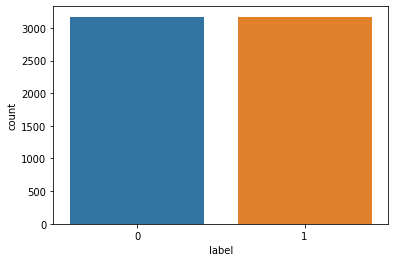

In [ ]:
sns.countplot(x="label", data=train_df)

In [ ]:
train_df = train_df.drop('Unnamed: 0', axis=1)
train_df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


**So For this project we are only using text column of given dataset***

In [ ]:
# shuffeling train data
train_df_shuffled = train_df.sample(frac=1, random_state=42)

In [ ]:
train_df_shuffled.head()

,title,text,label
1357,"American Dream, Revisited",Will Trump pull a Brexit times ten? What would...,0
2080,Clintons Are Under Multiple FBI Investigations...,Clintons Are Under Multiple FBI Investigations...,0
2718,The FBI Can’t Actually Investigate a Candidate...,Dispatches from Eric Zuesse This piece is cros...,0
812,Confirmed: Public overwhelmingly (10-to-1) say...,Print \n[Ed. – Every now and then the facade c...,0
4886,Nanny In Jail After Force Feeding Baby To Death,Nanny In Jail After Force Feeding Baby To Deat...,0


In [ ]:
train_df_shuffled.isnull().sum()

title    0
text     0
label    0
dtype: int64

##Printing Some ranf=dom news samples

In [ ]:
import random
random_index = random.randint(0, len(train_df)-5)

for row in train_df_shuffled[['text', 'label']][random_index:random_index+1].itertuples():
  _, text, target = row
  print(f"Target: {target}", '(Real News)' if target > 0 else '(Fake News)')
  print(f"News: {text}")
  print('---\n')

Target: 0 (Fake News)
News: Home › POLITICS | US NEWS › CNBC: TRUMP WILL WIN THE ELECTION AND IS MORE POPULAR THAN OBAMA IN 2008, AI SYSTEM FINDS CNBC: TRUMP WILL WIN THE ELECTION AND IS MORE POPULAR THAN OBAMA IN 2008, AI SYSTEM FINDS 0 SHARES [10/28/16] An artificial intelligence (AI) system that correctly predicted the last three U.S. presidential elections puts Republican nominee Donald Trump ahead of Democrat rival Hillary Clinton in the race to the White House. MogIA was developed by Sanjiv Rai, the founder of Indian start-up Genic.ai. It takes in 20 million data points from public platforms including Google, Facebook, Twitter and YouTube in the U.S. and then analyzes the information to create predictions. 
The AI system was created in 2004, so it has been getting smarter all the time. It had already correctly predicted the results of the Democrat and Republican Primaries. 
Data such as engagement with tweets or Facebook Live videos have been taken into account. The result is tha

# Preprocessing Data

In [ ]:
# import my nlp helper script
from nlp_helper import remove_html, remove_punctuation, remove_stopwords, lowercase_text, word_lemmatizer, word_stemmer

import nltk
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
text_data = train_df_shuffled['text'].tolist()
text_data[0]

'Will Trump pull a Brexit times ten? What would it take, beyond WikiLeaks, to bring the Clinton (cash) machine down? Will Hillary win and then declare WWIII against her Russia/Iran/Syria “axis of evil”? Will the Middle East totally explode? Will the pivot to Asia totally implode? Will China be ruling the world by 2025?\nAmidst so many frenetic fragments of geopolitical reality precariously shored against our ruins, the temptation is irresistible to hark back to the late, great, deconstructionist master Jean Baudrillard. During the post-mod 1980s it was hip to be Baudrillardian to the core; his America, originally published in France in 1986, should still be read today as the definitive metaphysical/geological/cultural Instagram of Exceptionalistan.\nBy the late 1990s, at the end of the millennium, two years before 9/11 – that seminal “before and after” event – Baudrillard was already stressing how we live in a black market maze. Now, it’s a black market paroxysm.\nGlobal multitudes are

### Removing HTML words

In [ ]:
text_data = train_df_shuffled['text'].apply(lambda x: remove_html(x))

### Removing Punctuations

In [ ]:
text_data = text_data.apply(lambda x: remove_punctuation(x))
text_data[:2]

1357    Will Trump pull a Brexit times ten What would ...
2080    Clintons Are Under Multiple FBI Investigations...
Name: text, dtype: object

### Lowercasing all words

In [ ]:
text_data = text_data.apply(lambda x: lowercase_text(x))
text_data[:2]

1357    [will, trump, pull, a, brexit, times, ten, wha...
2080    [clintons, are, under, multiple, fbi, investig...
Name: text, dtype: object

### Lemmanizing words

In [ ]:
text_data = text_data.apply(lambda x: word_lemmatizer(x))
text_data[:2]

1357    [will, trump, pull, a, brexit, time, ten, what...
2080    [clinton, are, under, multiple, fbi, investiga...
Name: text, dtype: object

### Stemmerizing

In [ ]:
text_data = text_data.apply(lambda x: word_stemmer(x))
text_data[:2]

1357    will trump pull a brexit time ten what would i...
2080    clinton are under multipl fbi investig a agent...
Name: text, dtype: object

# Train anc validation split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
len(text_data)

6335

In [ ]:
train_news, val_news, train_label, val_label = train_test_split(text_data, train_df_shuffled['label'], test_size=0.2, random_state=101)

In [ ]:
train_news.shape, val_news.shape

((5068,), (1267,))

**Calculating maximum length of text**

In [ ]:
round(sum([len(i.split()) for i in train_news])/ len(train_news))

786

#Converting text into numbers

* Vectorization Layer
* Embedding Layer

In [ ]:
from tensorflow.keras.layers import TextVectorization, Embedding

In [ ]:
max_vocab_length = 10000
max_length = 790

text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode='int',
    output_sequence_length=max_length,
)

In [ ]:
text_vectorizer.adapt(train_news)

In [ ]:
embedding = Embedding(
    input_dim = max_vocab_length, 
    output_dim = 128,
    input_length = max_length,
)

#Some helpful Functions

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_result(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {
      'accurecy': accuracy,
      'precision': model_precision,
      'recall': model_recall,
      'f1-score': model_f1,
  }

  return model_results

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# importing helper function
from helper_functions import create_tensorboard_callback, plot_loss_curves, pred_and_plot, unzip_data, walk_through_dir

--2021-11-08 19:22:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-08 19:22:34 (47.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



#Model Experiments

## Callbacks

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

##1. NavieBase Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

In [ ]:
model_0.fit(train_news, train_label)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
model_0.score(val_news, val_label)

0.7734806629834254

In [ ]:
model_0_perd = model_0.predict(val_news) 

model_0_result = calculate_result(val_label, model_0_perd)
model_0_result

{'accurecy': 0.7734806629834254,
 'f1-score': 0.7653864196239786,
 'precision': 0.8327285259750007,
 'recall': 0.7734806629834254}

##1. Simple Dense layer model

In [ ]:
train_news_data = tf.data.Dataset.from_tensor_slices(train_news)
train_label_data = tf.data.Dataset.from_tensor_slices(train_label)

train_dataset = tf.data.Dataset.zip((train_news_data, train_label_data)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_news_data = tf.data.Dataset.from_tensor_slices(val_news)
val_label_data = tf.data.Dataset.from_tensor_slices(val_label)

val_dataset = tf.data.Dataset.zip((val_news_data, val_label_data)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAvgPool1D()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 790)               0         
_________________________________________________________________
embedding (Embedding)        (None, 790, 128)          1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,288,321
Trainable params: 1,288,321
Non-trainable params: 0
___________________________________________________

In [ ]:
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy'],
)

history_1 = model_1.fit(
    train_dataset,
    epochs = 10,
    validation_data = val_dataset,
)

Epoch 1/10
159/159 [==============================] - 6s 16ms/step - loss: 0.5852 - accuracy: 0.7129 - val_loss: 0.4002 - val_accuracy: 0.8737
Epoch 2/10
159/159 [==============================] - 2s 15ms/step - loss: 0.3041 - accuracy: 0.8779 - val_loss: 0.2573 - val_accuracy: 0.9179
Epoch 3/10
159/159 [==============================] - 2s 16ms/step - loss: 0.1940 - accuracy: 0.9187 - val_loss: 0.2352 - val_accuracy: 0.9211
Epoch 4/10
159/159 [==============================] - 2s 15ms/step - loss: 0.1368 - accuracy: 0.9487 - val_loss: 0.2333 - val_accuracy: 0.9069
Epoch 5/10
159/159 [==============================] - 2s 16ms/step - loss: 0.0992 - accuracy: 0.9659 - val_loss: 0.2395 - val_accuracy: 0.9045
Epoch 6/10
159/159 [==============================] - 2s 15ms/step - loss: 0.0747 - accuracy: 0.9765 - val_loss: 0.2490 - val_accuracy: 0.8982
Epoch 7/10
159/159 [==============================] - 2s 15ms/step - loss: 0.0585 - accuracy: 0.9828 - val_loss: 0.2652 - val_accuracy: 0.8966

In [ ]:
model_1_pred = model_1.predict(val_dataset)
model_1_pred = tf.squeeze(tf.round(model_1_pred), axis=1)
model_1_result = calculate_result(val_label, model_1_pred)
model_1_result

{'accurecy': 0.9005524861878453,
 'f1-score': 0.9005190315467904,
 'precision': 0.9045365305692217,
 'recall': 0.9005524861878453}

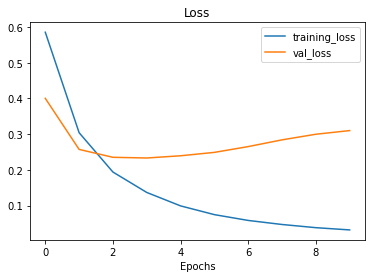

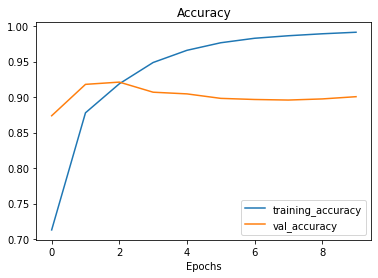

In [ ]:
plot_loss_curves(history_1)

##2. LSTM Model

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 790)               0         
_________________________________________________________________
embedding (Embedding)        (None, 790, 128)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 790, 64)           49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33  

In [ ]:
model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy'],
)

history_2 = model_2.fit(
    train_dataset,
    epochs = 10,
    validation_data = val_dataset,
    callbacks = [
              early_stopping,   
    ]
)

Epoch 1/10
159/159 [==============================] - 49s 269ms/step - loss: 0.5884 - accuracy: 0.6839 - val_loss: 0.8025 - val_accuracy: 0.5249
Epoch 2/10
159/159 [==============================] - 39s 246ms/step - loss: 0.2919 - accuracy: 0.8816 - val_loss: 0.6153 - val_accuracy: 0.7182
Epoch 3/10
159/159 [==============================] - 35s 222ms/step - loss: 0.3204 - accuracy: 0.8938 - val_loss: 0.7550 - val_accuracy: 0.6504
Epoch 4/10
159/159 [==============================] - 34s 216ms/step - loss: 0.4989 - accuracy: 0.7942 - val_loss: 0.3760 - val_accuracy: 0.8674
Epoch 5/10
159/159 [==============================] - 37s 230ms/step - loss: 0.2618 - accuracy: 0.9118 - val_loss: 0.5170 - val_accuracy: 0.7443
Epoch 6/10
159/159 [==============================] - 35s 222ms/step - loss: 0.6416 - accuracy: 0.5890 - val_loss: 0.6887 - val_accuracy: 0.5249
Epoch 7/10
159/159 [==============================] - 37s 230ms/step - loss: 0.6688 - accuracy: 0.5791 - val_loss: 0.5214 - val_ac

In [ ]:
model_2_pred = model_2.predict(val_news)
model_2_pred = tf.squeeze(tf.round(model_2_pred))
model_2_result = calculate_result(val_label, model_2_pred)
model_2_result

{'accurecy': 0.8674033149171271,
 'f1-score': 0.8662217602975767,
 'precision': 0.8753228934177308,
 'recall': 0.8674033149171271}

##GRU Layer Model

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs, outputs)

In [ ]:
model_4.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 790)               0         
_________________________________________________________________
embedding (Embedding)        (None, 790, 128)          1280000   
_________________________________________________________________
gru (GRU)                    (None, 790, 64)           37248     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33  

In [ ]:
model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_4 = model_4.fit(
    train_dataset,
    epochs = 10,
    validation_data = val_dataset,
    callbacks = [
              early_stopping,   
    ]
)

Epoch 1/10
159/159 [==============================] - 51s 296ms/step - loss: 0.5201 - accuracy: 0.7240 - val_loss: 0.5812 - val_accuracy: 0.6630
Epoch 2/10
 52/159 [========>.....................] - ETA: 28s - loss: 0.4544 - accuracy: 0.7776

In [ ]:
model_4_pred = model_4.predict(val_news)
model_4_pred = tf.squeeze(tf.round(model_4_pred))
model_4_result = calculate_result(val_label, model_4_pred)
model_4_result

In [ ]:
plot_loss_curves(history_4)

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs, outputs)

model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_5 = model_5.fit(
    train_dataset
    epochs = 10,
    validation_data = val_dataset,
    callbacks = [
              early_stopping,   
    ]
)

In [ ]:
model_5_pred = model_5.predict(val_news)
model_5_pred = tf.squeeze(tf.round(model_5_pred))
model_5_result = calculate_result(val_label, model_5_pred)
model_5_result

In [ ]:
plot_loss_curves(history_5)

##Bidirectional LSTM Model

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_6 = tf.keras.Model(inputs, outputs)

In [ ]:
model_6.summary()

In [ ]:
 model_6.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

model_6.fit(
    train_dataset,
    epochs = 10,
    validation_data = val_dataset,
    callbacks = [
              early_stopping,   
    ]
)

In [ ]:
model_6_pred = model_6.predict(val_news)
model_6_pred = tf.squeeze(tf.round(model_6_pred))
model_6_result = calculate_result(val_label, model_6_pred)
model_6_result

##Conv1D Model

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(
    filters = 64,
    kernel_size = 5,
    padding = 'valid',
    activation='relu',
)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_7 = tf.keras.Model(inputs, outputs)

In [ ]:
model_7.summary()

In [ ]:
model_7.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_7 = model_7.fit(
    train_dataset,
    epochs = 10,
    validation_data = val_dataset,
    callbacks = [
              early_stopping,   
    ]
)

In [ ]:
model_7_pred = model_7.predict(val_news)
model_7_pred = tf.squeeze(tf.round(model_7_pred))
model_7_result = calculate_result(val_label, model_7_pred)
model_7_result

In [ ]:
plot_loss_curves(history_7)

##Pretrained Model

In [ ]:
import tensorflow_hub as hub

embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [ ]:
sentence_encoder_layer = hub.KerasLayer(
    'https://tfhub.dev/google/universal-sentence-encoder/4',
    input_shape=[],
    dtype = tf.string,
    trainable =False,
    name = "USE"
)

In [ ]:
model_8 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name = 'modes_7_USE')

model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

In [ ]:
model_8.summary()

In [ ]:
history_8  = model_8.fit(
    train_dataset,
    epochs = 10,
    validation_data = val_dataset,
    callbacks = [
              early_stopping,   
    ]
)

In [ ]:
model_8_pred = model_8.predict(val_news)
model_8_pred = tf.squeeze(tf.round(model_8_pred))
model_8_result = calculate_result(val_label, model_8_pred)
model_8_result

In [ ]:
plot_loss_curves(history_8)

#Comparing all Models results

In [ ]:
all_model_results = pd.DataFrame({
    '0_NaiveBse_Model': model_0_result,
    '1_simple_dense': model_1_result,
    '2_LSTM': model_2_result,
    '3_GRU_1': model_4_result,
    '4_GRU_2': model_5_result,
    '5_bidirectional': model_6_result,
    '6_conv1D': model_7_result,
    'tf_hub_encoder': model_8_result,
})

In [ ]:
all_model_results = all_model_results.transpose()
all_model_results

In [ ]:
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0,1.0));

In [ ]:
all_model_results.sort_values('f1-score', ascending=False)['f1-score'].plot(kind='bar', figsize=(10, 7))
plt.title('F1-Score Plot');

In [ ]:
all_model_results.sort_values('accurecy', ascending=False)['accurecy'].plot(kind='bar', figsize=(10, 7))
plt.title('Accuracy plot');